In [1]:
import numpy as np
from  sklearn.datasets import load_svmlight_file as a
from scipy.sparse import coo_matrix, vstack
from sklearn import svm 
from sklearn import cross_validation 
import matplotlib.pyplot as plt
from sklearn.decomposition import RandomizedPCA
from sklearn import preprocessing
from matplotlib.mlab import PCA as mlabPCA
from pylab import show,title,plot
from sklearn.lda import LDA
%matplotlib inline

In [2]:
#Load all Datasets
Data1=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\BBC.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data2=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\CNN.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data3=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\CNNIBN.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data4=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\NDTV.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)
Data5=a("C:\Users\Sanju\Desktop\datasets\TV_News_Channel_Commercial_Detection_Dataset\TIMESNOW.txt",n_features=4125,dtype=np.float64,multilabel=False,zero_based='auto',query_id=False)

In [3]:
#x is an sparse matrix(n_samples.n_features), (y is a list of n_samples)

data1x,data1y=Data1
data2x,data2y=Data2
data3x,data3y=Data3
data4x,data4y=Data4
data5x,data5y=Data5

x1=coo_matrix(data1x)
x2=coo_matrix(data2x)
x3=coo_matrix(data3x)
x4=coo_matrix(data4x)
x5=coo_matrix(data5x)

data_X=vstack([x1,x2,x3,x4,x5]).toarray()

print data_X.shape

Data_Y=np.concatenate((data1y,data2y,data3y,data4y,data5y), axis=1)
print Data_Y.shape    

(129685L, 4125L)
(129685L,)


In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    data_X, Data_Y, test_size=0.25,random_state=100)

In [5]:
#Normalized Data
from sklearn import preprocessing

#Normalise Each Feature
X_train_1=X_train
X_test_1=X_test

X_train_1=preprocessing.normalize(X_train_1,norm='l2')
X_test_1=preprocessing.normalize(X_test_1,norm='l2')


        
print  X_train_1.shape         
print  X_test_1.shape

(97263L, 4125L)
(32422L, 4125L)


In [7]:
#PCA implementataion 
pca = RandomizedPCA(n_components=2).fit(X_train_1[0:75000])
X_train_pca=pca.transform(X_train_1[0:75000])
print pca.explained_variance_
print pca.explained_variance_ratio_

X_test_pca=pca.transform(X_test_1[0:25000])

X_train_pca_1=X_train_pca
X_test_pca_1=X_test_pca
print max(X_train_pca_1[0:,0])
print max(X_train_pca_1[0:,1])
print y_train[0:10]

[ 0.05943109  0.01108892]
[ 0.75157061  0.14023139]
1.35464940625
0.364381376269
[ 1. -1. -1.  1.  1.  1.  1. -1. -1.  1.]


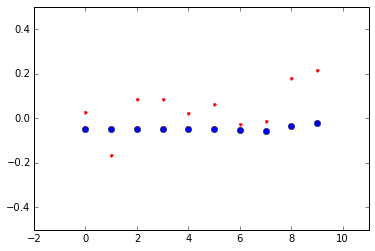

In [162]:
x1_min=min(X_test_pca_1[0:,0])
x1_max=max(X_test_pca_1[0:,0])

x2_min=min(X_test_pca_1[0:,1])
x2_max=max(X_test_pca_1[0:,1])



plt.figure()
plt.plot(X_test_pca_1[0:10,0], 'bo')
plt.plot(X_test_pca_1[0:10,1], 'r.')
plt.xlim(-2,11)
plt.ylim(-0.5,0.5)
plt.show()


In [45]:
slf=svm.SVC(kernel='linear',C=1).fit(X_train_pca_1,y_train[0:75000])

In [61]:
slf.score(X_test_pca_1,y_test[0:25000])*100

72.984000000000009

[-1.34338936 -8.40781762]


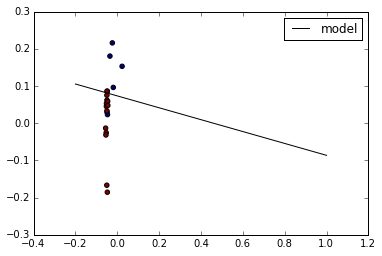

In [158]:
w = slf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(-0.2,1)
yy = a * xx - slf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="model")

plt.scatter(X_test_pca_1[:20, 0], X_test_pca_1[:20, 1], c = y_test[:20])
plt.legend()
plt.show()